In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from tensorflow import keras
from tensorflow.keras.constraints import max_norm

from utils.plotting_BGM import plot_results, plot_boundaries
from utils.cluster_regression import gaussian_regression

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GaussianMixture

In [2]:
# Set plot resolution
%matplotlib inline
mpl.rcParams['figure.dpi']= 300

In [3]:
# Configurable training parameters
Gaussian_Mixture = True
Bayesian_Gaussian_Mixture = True
Train_Set = False
Test_Set = True

# Load Dataset...
df = pd.read_csv('data/ex.csv')

dataset = df.copy()

X = dataset.values
x_cords = dataset['x'].values
y_cords = dataset['y'].values

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x_cords, y_cords, test_size=0.20, random_state=np.random.seed(6))

X_test = np.stack((x_test, y_test), axis=1)
X_train = np.stack((x_train, y_train), axis=1)

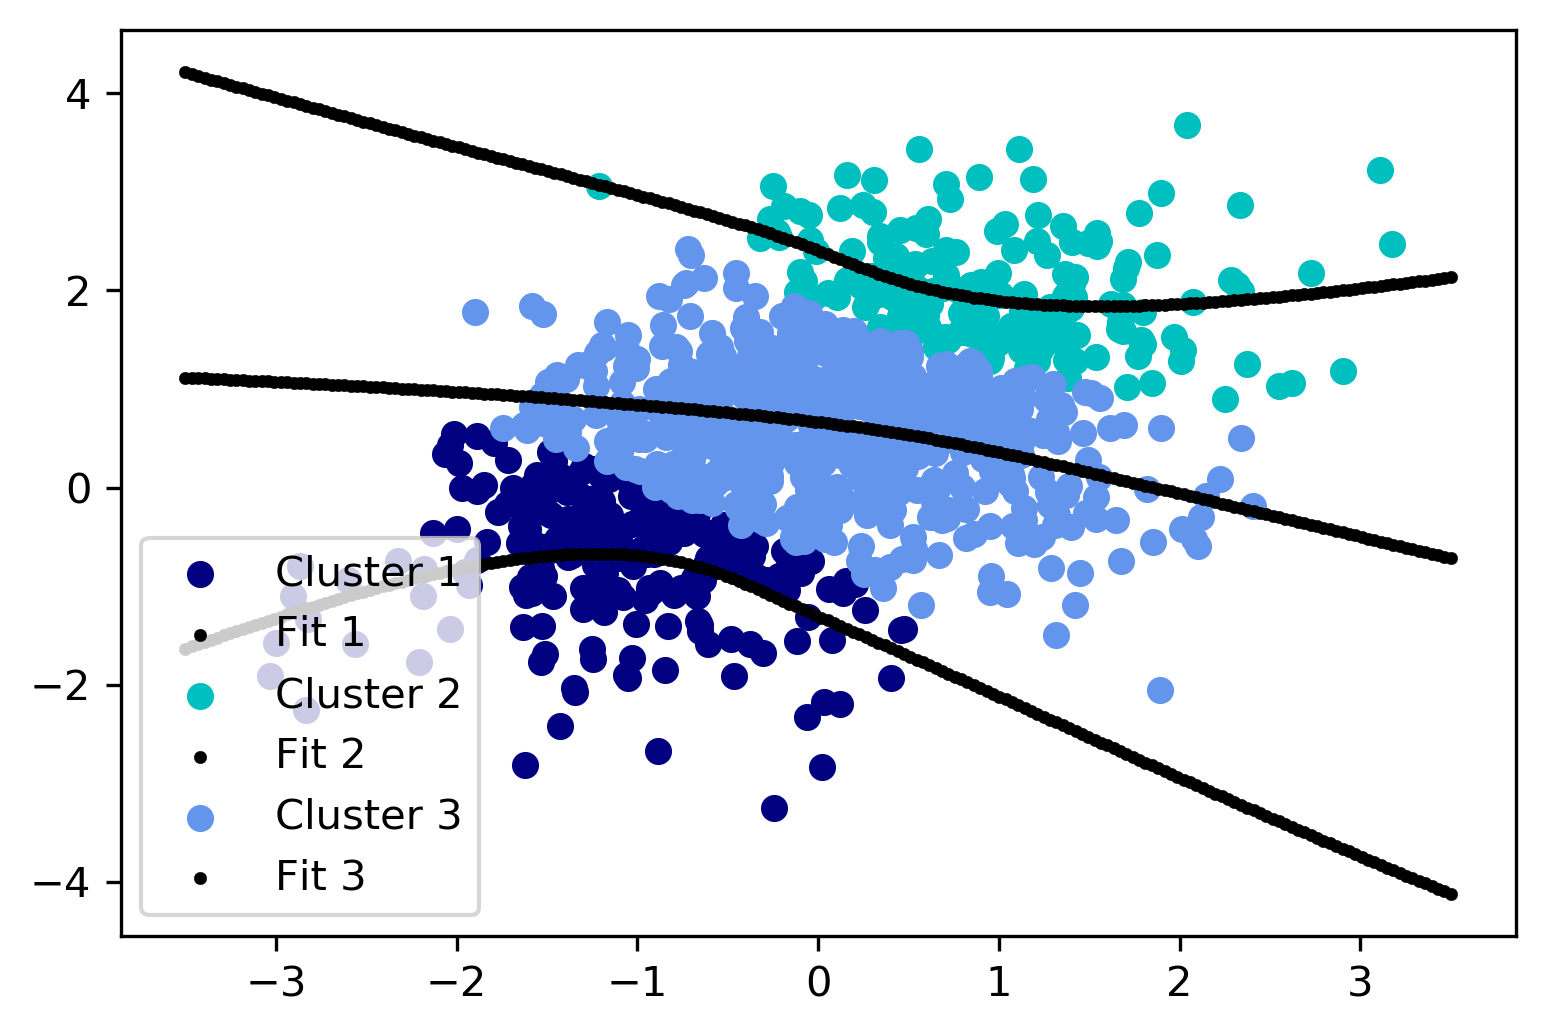

In [5]:
if Gaussian_Mixture:
    if Train_Set:
        X_gmm = X_train
        # x_cords, y_cords = x_train, y_train

        gmm = GaussianMixture(
            n_components=3,
            covariance_type='full',
            random_state = np.random.seed(4)).fit(X_gmm)

        # use whole dataset for prediction
        y_pred = gmm.predict(X)

        # Plotting...
        gaussian_regression(x_cords, y_cords, y_pred)

    if Test_Set:
        X_gmm = X_test
        # x_cords, y_cords = x_test, y_test    

        gmm = GaussianMixture(
            n_components=3,
            covariance_type='full',
            max_iter = 500,
            random_state = np.random.seed(4)).fit(X_gmm)
        
        # use whole dataset for prediction
        y_pred = gmm.predict(X)

        # Plotting...
        gaussian_regression(x_cords, y_cords, y_pred)

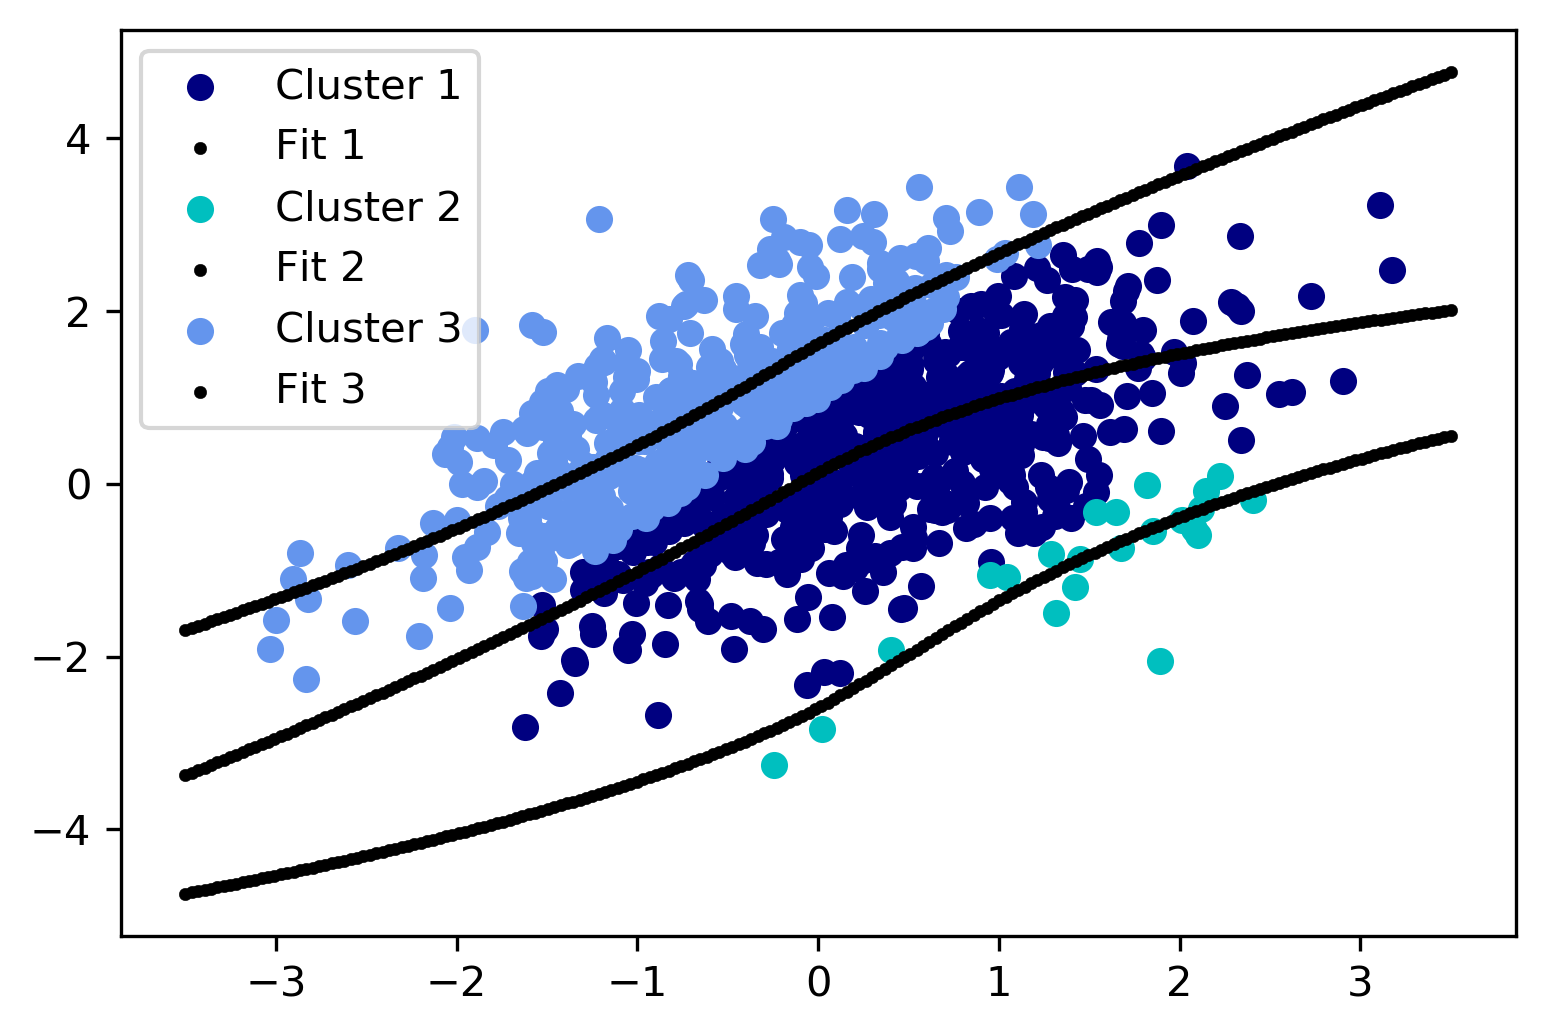

In [6]:
if Bayesian_Gaussian_Mixture:
    if Train_Set:
        X_bgm = X_train
        # x_cords, y_cords = x_train, y_train

        bgm = BayesianGaussianMixture(
            n_components=3,
            covariance_type='full',
            random_state = np.random.seed(3)).fit(X_bgm)
            
        # use train data for prediction
        y_pred = bgm.predict(X)

        # Plotting...
        gaussian_regression(x_cords, y_cords, y_pred)

    if Test_Set:
        X_bgm = X_test
        # x_cords, y_cords = x_test, y_test

        bgm = BayesianGaussianMixture(
            n_components=3,
            covariance_type='full',
            max_iter = 500,
            random_state = np.random.seed(3)).fit(X_bgm)
        
        # use train data for prediction
        y_pred = bgm.predict(X)

        # Plotting...
        gaussian_regression(x_cords, y_cords, y_pred)